<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/practica25_263166.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica #25. Arbol de Decisión 1**

Link Github: [Practica25_LB](https://github.com/LailaBulh/Programacion---Claas-Files/blob/main/practica25_263166.ipynb)

### **1) Carga de datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Upload file
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'

df = pd.read_csv(url, header=None, sep=',')
print('Dataset original\n',df.head())

### Renombrar columnas
df = df.rename(columns= {0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT', 13:'MEDV'})

print('\n\nDataset con columnas renombradas\n', df.head())

Dataset original
         0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


Dataset con columnas renombradas
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  

### **2) Análisis de datos**

In [ ]:
print(df.info())

print('\nResumen estadistico de los datos\n', df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Resumen estadistico de los datos
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   1

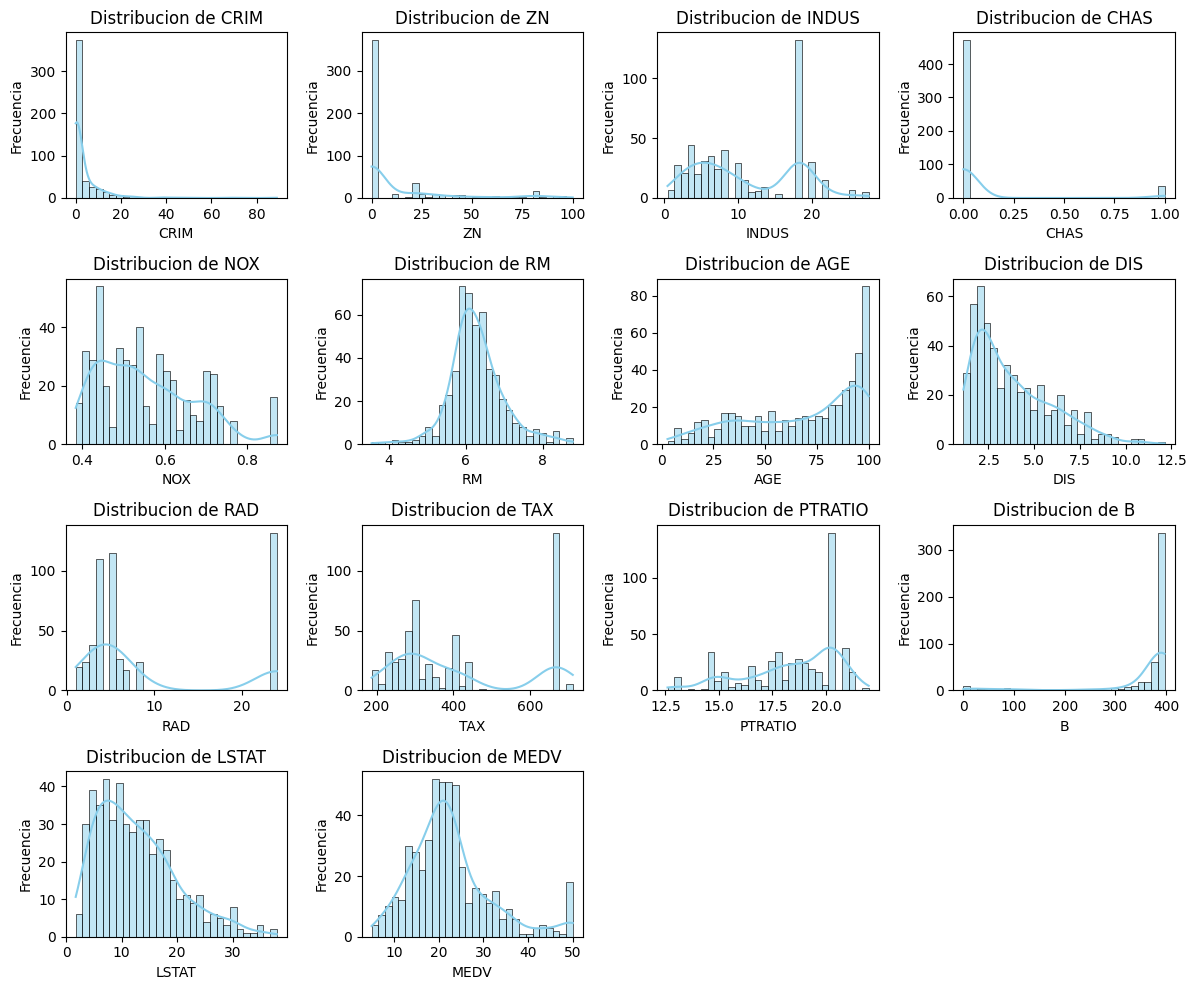

In [ ]:
### Histogramas de distribucion

plt.figure(figsize= (12, 10))

for i, col in enumerate(df.columns, 1):
  plt.subplot(4, 4, i)
  sns.histplot(df[col], kde= True, bins= 30, color='skyblue')
  plt.title(f'Distribucion de {col}', fontsize = 12)
  plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### **3) Preporcesamiento**

In [ ]:
print('Número de valores nulos por columna:\n', df.isnull().sum())


Número de valores nulos por columna:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


No se encontraron datos nulos en este dataset, por lo que no fue necesario realizar ninguna acción.

### **4) División de conjuntos**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
### Variables predictoras

### Se utiliza la columna MEDV como predictora porque es la salida del dataset
X = df.drop('MEDV', axis= 1)
y = df['MEDV']

#X, y = df(return_X_y= True)

### División de datos, 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

print('X_train:\n', X_train)
print('\nX_test:\n', X_test)
print('\ny_train:\n', y_train)
print('\ny_test:\n', y_test)

X_train:
          CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
5     0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0   
116   0.13158   0.0  10.01     0  0.547  6.176  72.5  2.7301    6  432.0   
45    0.17142   0.0   6.91     0  0.448  5.682  33.8  5.1004    3  233.0   
16    1.05393   0.0   8.14     0  0.538  5.935  29.3  4.4986    4  307.0   
468  15.57570   0.0  18.10     0  0.580  5.926  71.0  2.9084   24  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
106   0.17120   0.0   8.56     0  0.520  5.836  91.9  2.2110    5  384.0   
270   0.29916  20.0   6.96     0  0.464  5.856  42.1  4.4290    3  223.0   
348   0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280.0   
435  11.16040   0.0  18.10     0  0.740  6.629  94.6  2.1247   24  666.0   
102   0.22876   0.0   8.56     0  0.520  6.405  85.4  2.7147    5  384.0   

     PTRATIO       B  LSTAT  
5       18.7  394.12   5.21  
116     17.8  393

### **5) Entrenamiento**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor


In [ ]:
DTree_model = DecisionTreeRegressor(max_depth= 3)
DTree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3)

Se utilizó el método de *DecisionTreeRegressor* porque se estan intentando predecir valores númericos y se puso un máximo de 3 niveles para el árbol.


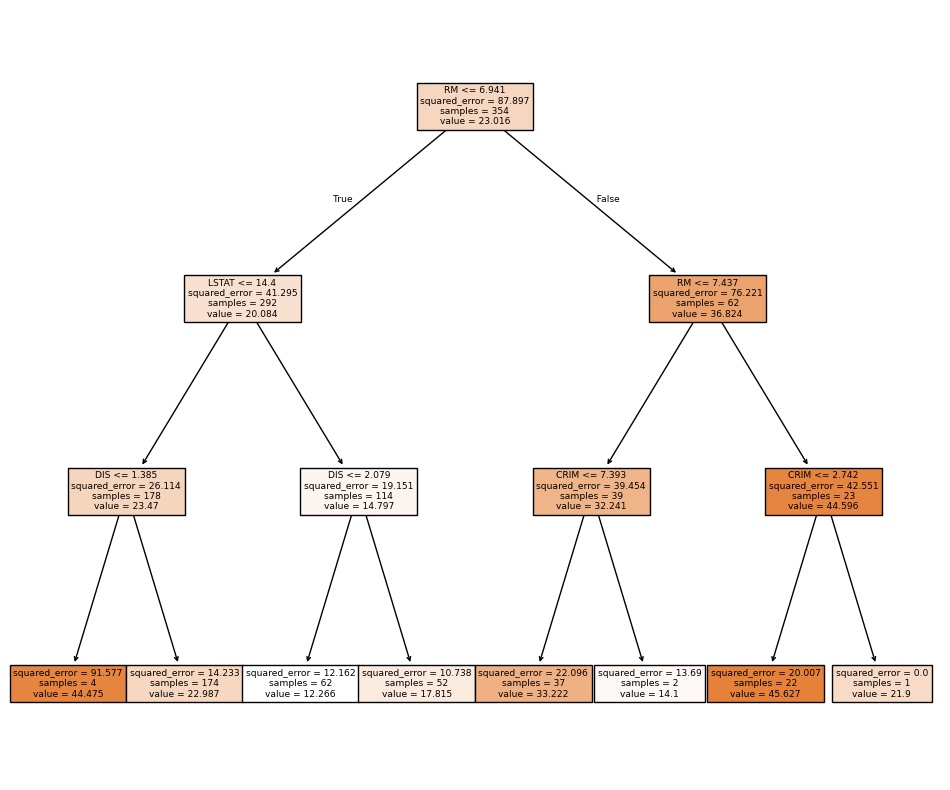

In [ ]:
plt.figure(figsize= (12, 10))
plot_tree(DTree_model, filled= True, feature_names= X.columns, class_names= ['0', '1'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se usaron las métricas de regresión para evaluar el modelo.

In [ ]:
### Evaluación depth 3

y_pred = DTree_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 14.015413431688339
MAE: 3.1224428336570913
R²: 0.8088818982508005


### **6) Optimización**

Experimento #1 se pone una profundidad de 5


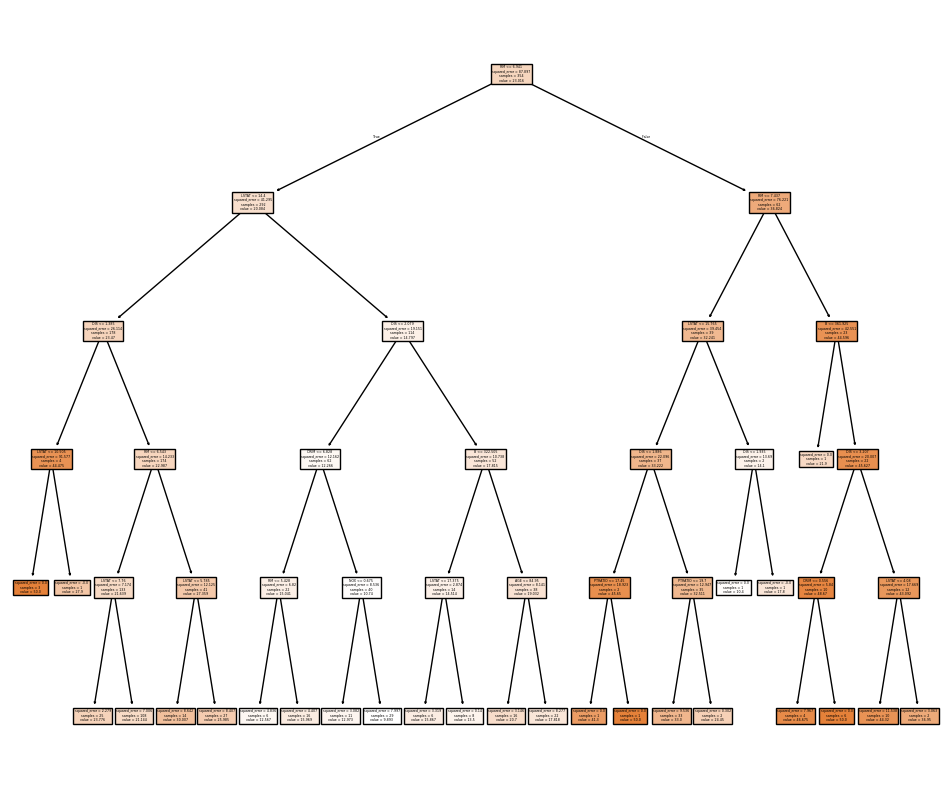

In [ ]:
### Experimento 1

DTree5 = DecisionTreeRegressor(max_depth= 5)
DTree5.fit(X_train, y_train)

plt.figure(figsize= (12, 10))
plot_tree(DTree5, filled= True, feature_names= X.columns, class_names= ['0', '1'])
plt.show()

In [ ]:
### Evaluación depth 5

y_pred = DTree5.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 20.0990212913041
MAE: 2.652551794141551
R²: 0.7259241181194287


Experimento #2 se pone una profundidad de 7


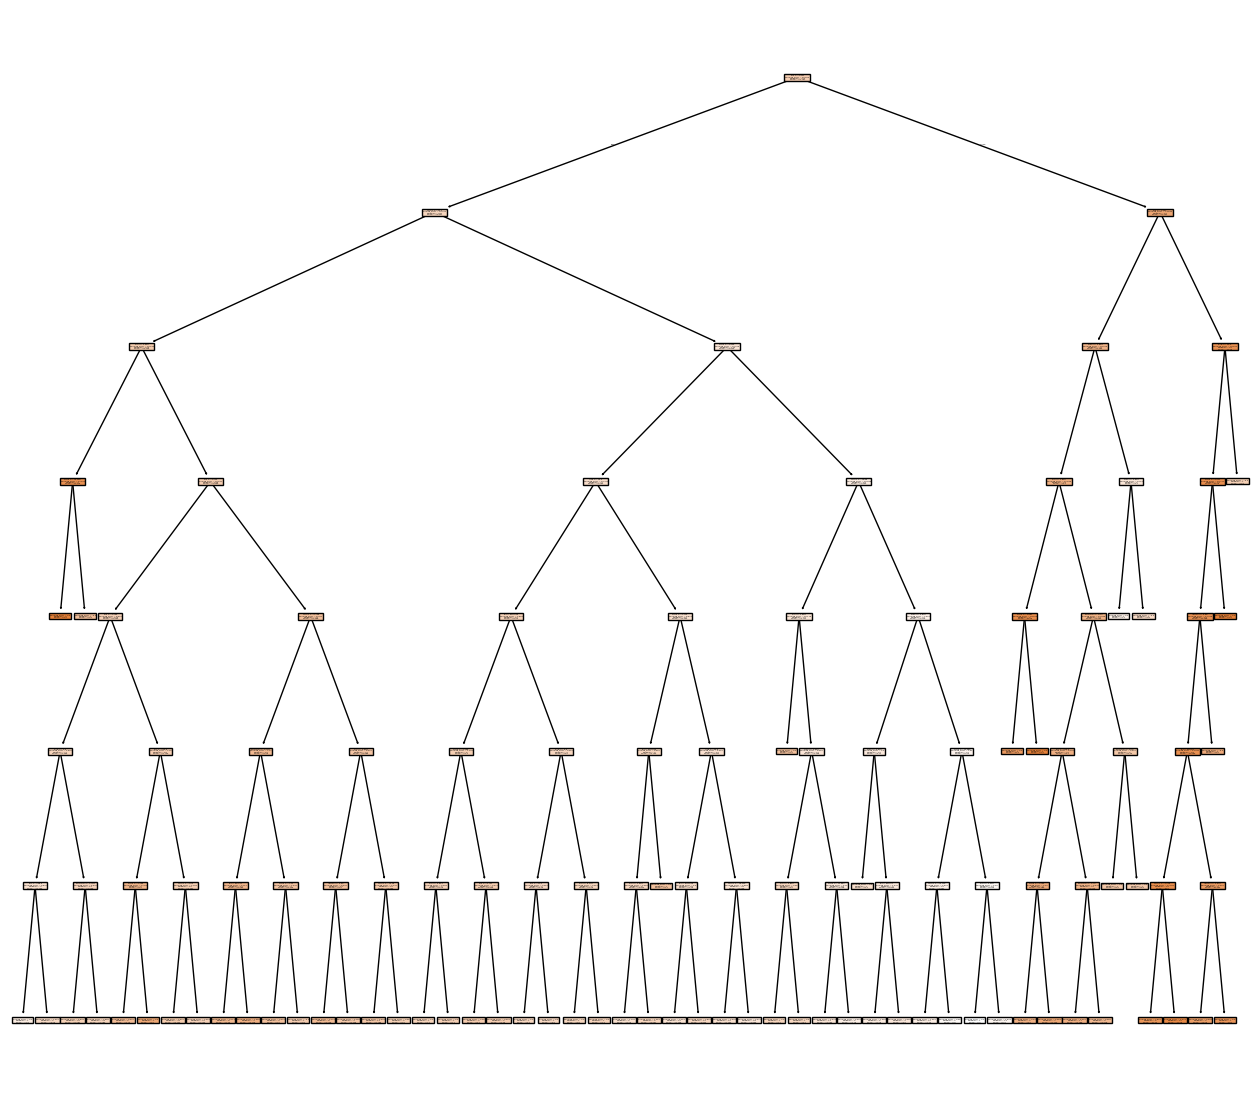

In [ ]:
### Experimento 2

DTree7 = DecisionTreeRegressor(max_depth= 7)
DTree7.fit(X_train, y_train)

plt.figure(figsize= (16, 14))
plot_tree(DTree7, filled= True, feature_names= X.columns, class_names= ['0', '1'])
plt.show()

In [37]:
### Evaluación depth 7

y_pred = DTree7.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 8.04254128442053
MAE: 2.0956079547203497
R²: 0.8903296552035526


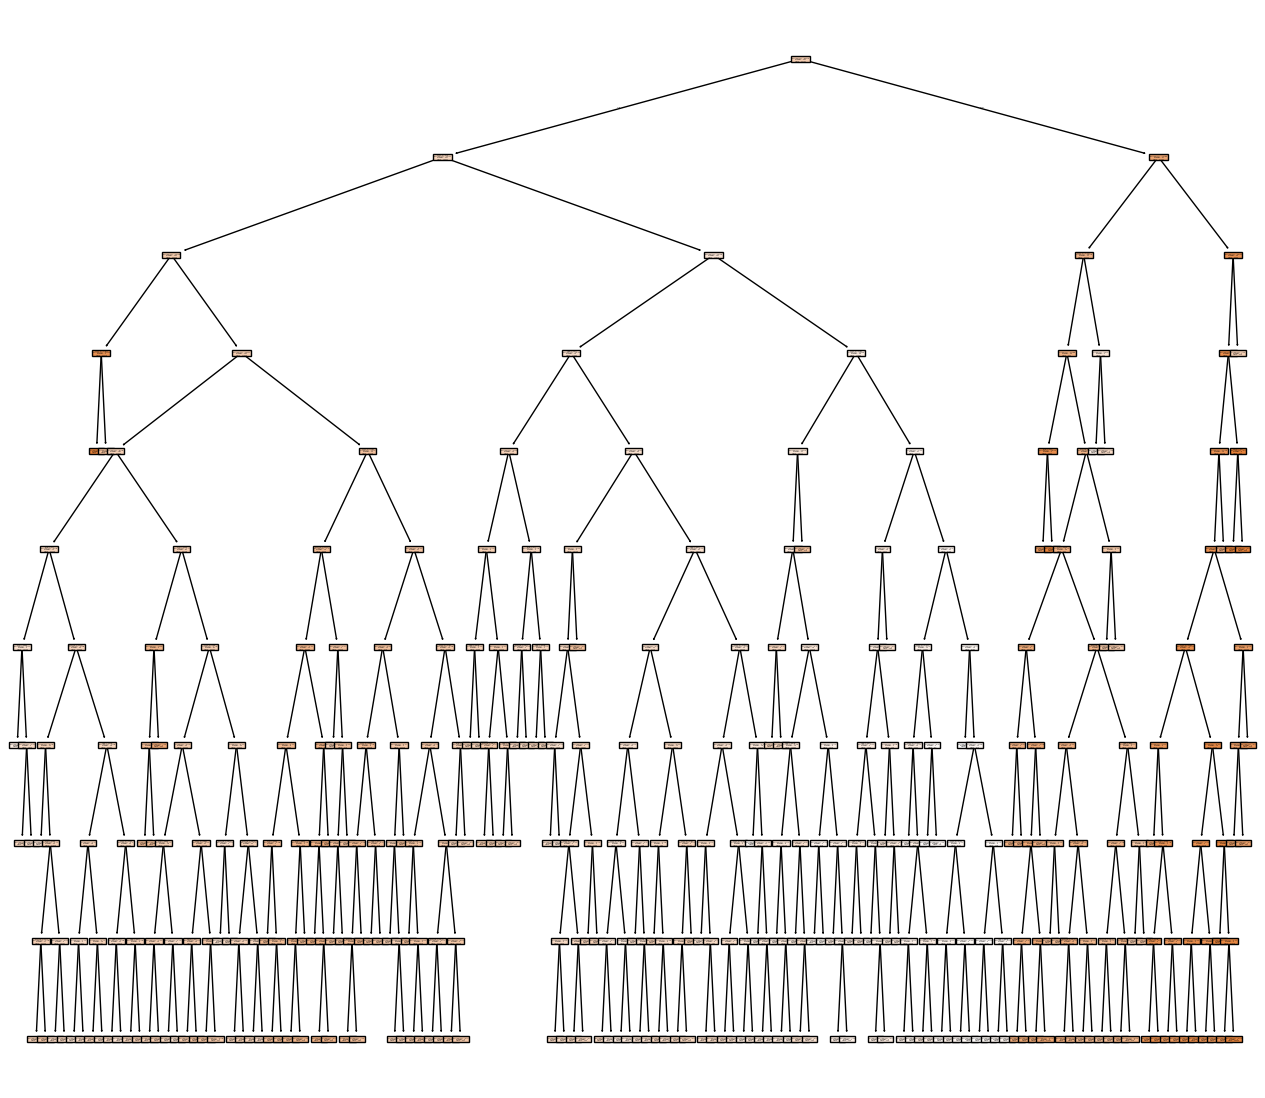

In [39]:
### Experimento 3

DTree10 = DecisionTreeRegressor(max_depth= 10)
DTree10.fit(X_train, y_train)

plt.figure(figsize= (16, 14))
plot_tree(DTree10, filled= True, feature_names= X.columns, class_names= ['0', '1'])
plt.show()

In [40]:
### Evaluación depth 10

y_pred = DTree7.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 8.04254128442053
MAE: 2.0956079547203497
R²: 0.8903296552035526


Se hizo un análisis de las métricas de MSE - Error cuadrático Medio, MAE - Error absoluto medio y R² - Coeficiente de determinación, obteniendo los resultados de la siguiente tabla:


| Profundidad | MSE    | MAE   | R²    |
|-------------|--------|-------|-------|
| depth = 3   | 14.015 | 3.122 | 0.808 |
| depth = 5   | 20.099 | 2.652 | 0.725 |
| depth = 7   | 8.042  | 2.095 | 0.890 |
| depth = 10  | 8.042  | 2.095 | 0.890 |

Se pudo ver al correr el árbol de decisiones con 7 y 10 niveles de profundidad el error cuadrático medio fue el mismo, y fue el menor de las cuatro corridas que se hicieron.

Al usar 5 niveles de profundidad vimos que aumento tanto el MSE y MAE, y al subir a 7 y 10 niveles de profundidad estos errores disminuyeron.

Se puede decir que el mejor nivel de profundidad para correr el árbol de decisiones es con un nivel de profundidad 7 porque aunque el 7 y 10 tienen los mismos resultados, en el nivel 7 se tiene la capacidad óptima.

### 7) **Evaluación**